In [1]:
import pandas as pd 

In [4]:
df = pd.read_csv('/content/mumbai_weather_data.csv', index_col=0)

In [5]:
df.columns

Index(['input_latitude', 'input_longitude', 'date', 'temperature', 'humidity',
       'surface_pressure', 'rain', 'weathercode', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'wind_speed', 'wind_direction',
       'windgusts_10m', 'output_latitude', 'output_longitude'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436128 entries, 0 to 436127
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   input_latitude    436128 non-null  float64
 1   input_longitude   436128 non-null  float64
 2   date              436128 non-null  object 
 3   temperature       436128 non-null  float64
 4   humidity          436128 non-null  int64  
 5   surface_pressure  436128 non-null  float64
 6   rain              436128 non-null  float64
 7   weathercode       436128 non-null  int64  
 8   cloudcover_low    436128 non-null  int64  
 9   cloudcover_mid    436128 non-null  int64  
 10  cloudcover_high   436128 non-null  int64  
 11  wind_speed        436128 non-null  float64
 12  wind_direction    436128 non-null  int64  
 13  windgusts_10m     436128 non-null  float64
 14  output_latitude   436128 non-null  float64
 15  output_longitude  436128 non-null  float64
dtypes: float64(9), int64

In [8]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%dT%H:%M') # Format Date column as datetime

In [9]:
df['date']

0        2021-01-01 00:00:00
1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
                 ...        
436123   2023-04-06 19:00:00
436124   2023-04-06 20:00:00
436125   2023-04-06 21:00:00
436126   2023-04-06 22:00:00
436127   2023-04-06 23:00:00
Name: date, Length: 436128, dtype: datetime64[ns]

In [20]:
unique_pairs = df[['input_latitude', 'input_longitude']].drop_duplicates()

In [21]:
unique_pairs

,input_latitude,input_longitude
0,19.044000,73.032500
19416,19.113505,73.008978
38832,19.053536,72.846430
58248,19.137500,72.915056
77664,19.232410,72.868950
97080,19.165332,72.922099
116496,18.967020,72.842140
135912,18.993616,72.812811
155328,19.108610,72.836220
174744,19.192056,72.958519


In [17]:
len(unique_pairs)

22

In [18]:
unique_pairs = df[['output_latitude', 'output_longitude']].drop_duplicates()

In [19]:
len(unique_pairs)

14

In [30]:
# KhindipadaBhandupWestMumbaiIITM Lat-Long is [19.1653, 72.9221]
# ChhatrapatiShivajiIntlAirportT2MumbaiMPCB is [19.1008, 72.8746]
df_station = df[((df['input_latitude'].round(decimals=4) == 19.1653) & 
      (df['input_longitude'].round(decimals=4) == 72.9221)) |
      ((df['input_latitude'].round(decimals=4) == 19.1008) & 
      (df['input_longitude'].round(decimals=4) == 72.8746))]

In [31]:
df_station.columns

Index(['input_latitude', 'input_longitude', 'date', 'temperature', 'humidity',
       'surface_pressure', 'rain', 'weathercode', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'wind_speed', 'wind_direction',
       'windgusts_10m', 'output_latitude', 'output_longitude'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436128 entries, 0 to 436127
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   input_latitude    436128 non-null  float64       
 1   input_longitude   436128 non-null  float64       
 2   date              436128 non-null  datetime64[ns]
 3   temperature       436128 non-null  float64       
 4   humidity          436128 non-null  int64         
 5   surface_pressure  436128 non-null  float64       
 6   rain              436128 non-null  float64       
 7   weathercode       436128 non-null  int64         
 8   cloudcover_low    436128 non-null  int64         
 9   cloudcover_mid    436128 non-null  int64         
 10  cloudcover_high   436128 non-null  int64         
 11  wind_speed        436128 non-null  float64       
 12  wind_direction    436128 non-null  int64         
 13  windgusts_10m     436128 non-null  float64       
 14  outp

In [43]:
df_station.loc[(df_station['input_latitude'].round(decimals=4) == 19.1653) & 
       (df_station['input_longitude'].round(decimals=4) == 72.9221), 'station_name'] = 'KhindipadaBhandupWestMumbaiIITM'

In [44]:
# ChhatrapatiShivajiIntlAirportT2MumbaiMPCB is [19.1008, 72.8746]
df_station.loc[(df_station['input_latitude'].round(decimals=4) == 19.1008) & 
       (df_station['input_longitude'].round(decimals=4) == 72.8746), 'station_name'] = 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB'

In [38]:
df_station.columns

Index(['input_latitude', 'input_longitude', 'date', 'temperature', 'humidity',
       'surface_pressure', 'rain', 'weathercode', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'wind_speed', 'wind_direction',
       'windgusts_10m', 'output_latitude', 'output_longitude', 'station_name'],
      dtype='object')

<Axes: xlabel='date'>

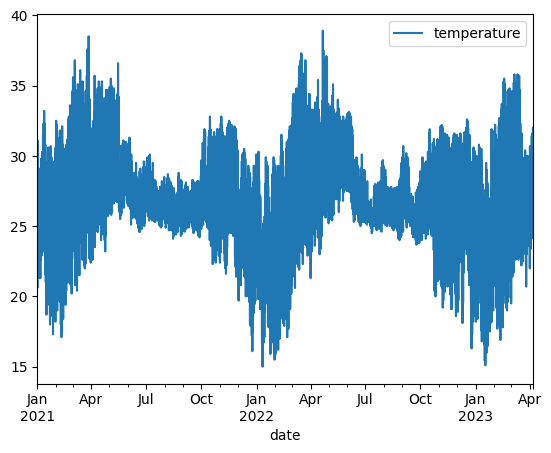

In [48]:
df1 = df_station[df_station['station_name']=='KhindipadaBhandupWestMumbaiIITM']
df1[['date', 'temperature']].set_index('date').plot()

In [54]:
df1['temperature'].describe()

count    19824.000000
mean        26.413413
std          3.427972
min         15.000000
25%         24.800000
50%         26.300000
75%         28.300000
max         38.900000
Name: temperature, dtype: float64

<Axes: xlabel='date'>

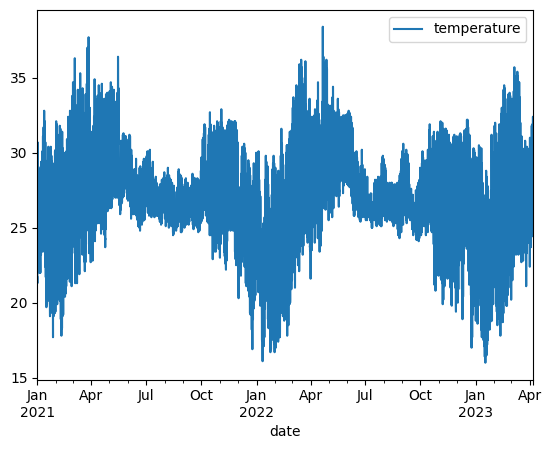

In [49]:
df2 = df_station[df_station['station_name']=='ChhatrapatiShivajiIntlAirportT2MumbaiMPCB']
df2[['date', 'temperature']].set_index('date').plot()

In [55]:
df2['temperature'].describe()

count    19824.000000
mean        26.718861
std          3.148315
min         16.000000
25%         25.200000
50%         26.600000
75%         28.600000
max         38.400000
Name: temperature, dtype: float64

In [57]:
df1.to_csv('KhindipadaBhandupWestMumbaiIITM_weather.csv')
df2.to_csv('ChhatrapatiShivajiIntlAirportT2MumbaiMPCB_weather.csv')